1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
Сделать выводы о зависимости ошибки от этих параметров.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn import model_selection

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [15]:
def gb_fit(n_trees, max_depth, X_train, y_train, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
#             train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
#             test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
#             train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
#             test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees #, train_errors, test_errors

In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
#     plt.xlim(0, n_trees)
    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [26]:
# Шаг
eta = 1
n_trees_list = [3, 5, 10, 30, 50, 70]
max_depth = 5
train_err_list = []
test_err_list = []
for n_trees in n_trees_list:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_trees
    # обучаем модель
    trees = gb_fit(n_trees, max_depth, X_train, y_train, coefs, eta)
    # предсказываем значения
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    # вычисляем ошибку
    err_train = mean_squared_error(y_train, train_prediction)
    err_test = mean_squared_error(y_test, test_prediction)
    # добавляем в массив
    train_err_list.append(err_train)
    test_err_list.append(err_test)

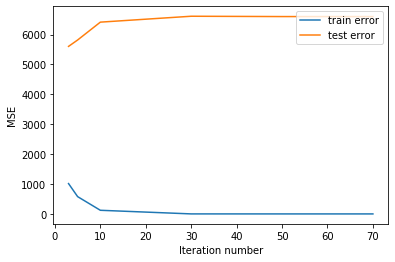

In [27]:
get_error_plot(n_trees_list, train_err_list, test_err_list)

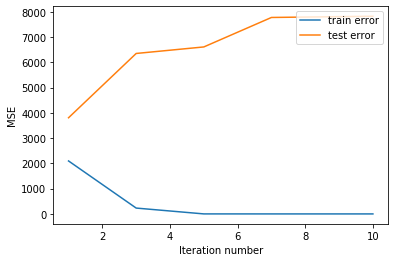

In [28]:
# Шаг
eta = 1
n_trees = 30
max_depth_list = [1, 3, 5, 7, 10]
train_err_list = []
test_err_list = []
for max_depth in max_depth_list:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_trees
    # обучаем модель
    trees = gb_fit(n_trees, max_depth, X_train, y_train, coefs, eta)
    # предсказываем значения
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    # вычисляем ошибку
    err_train = mean_squared_error(y_train, train_prediction)
    err_test = mean_squared_error(y_test, test_prediction)
    # добавляем в массив
    train_err_list.append(err_train)
    test_err_list.append(err_test)
get_error_plot(max_depth_list, train_err_list, test_err_list)

При увеличении количества деревьев и глубины деревьев ошибка тренировочной выборки сокращается, а ошибка тестовой выборки возрастает, что свидетельствует о переобучении модели.